In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("bank.csv")


In [3]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## Basic checks

In [4]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,165024,165025,165026,165027,165028,165029,165030,165031,165032,165033
id,0,1,2,3,4,5,6,7,8,9,...,165024,165025,165026,165027,165028,165029,165030,165031,165032,165033
CustomerId,15674932,15749177,15694510,15741417,15766172,15771669,15692819,15669611,15691707,15591721,...,15734886,15687079,15617454,15703793,15704770,15667085,15665521,15664752,15689614,15732798
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam,Genovese,Ch'ang,Chukwuebuka,Manna,Cattaneo,...,Martin,T'ang,Ifeatu,Bevan,Oluchukwu,Meng,Okechukwu,Hsia,Hsiung,Ulyanov
CreditScore,668,627,678,581,716,588,593,678,676,583,...,592,635,724,767,630,667,792,565,554,850
Geography,France,France,France,France,Spain,Germany,France,Spain,France,Germany,...,Germany,France,Germany,France,France,Spain,France,France,Spain,France
Gender,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male,...,Female,Female,Male,Female,Male,Female,Male,Male,Female,Male
Age,33.0,33.0,40.0,34.0,33.0,36.0,30.0,37.0,43.0,40.0,...,33.0,38.0,59.0,44.0,50.0,33.0,35.0,31.0,30.0,31.0
Tenure,3,1,10,2,5,4,8,1,4,4,...,3,9,2,4,8,2,3,5,7,1
Balance,0.0,0.0,0.0,148882.54,0.0,131778.58,144772.69,138476.41,0.0,81274.33,...,110993.29,0.0,68999.66,76554.06,0.0,0.0,0.0,0.0,161533.0,0.0
NumOfProducts,2,2,2,1,2,1,1,1,2,1,...,2,2,1,2,2,1,1,1,1,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
train_data.drop('id',axis=1,inplace=True)


# Exploratory data analysis

In [9]:
train_data.isnull().any().any()

False

In [10]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

num_cols = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

target = 'Exited'

In [11]:
train_data.drop(columns=['Surname'],axis=1,inplace=True)


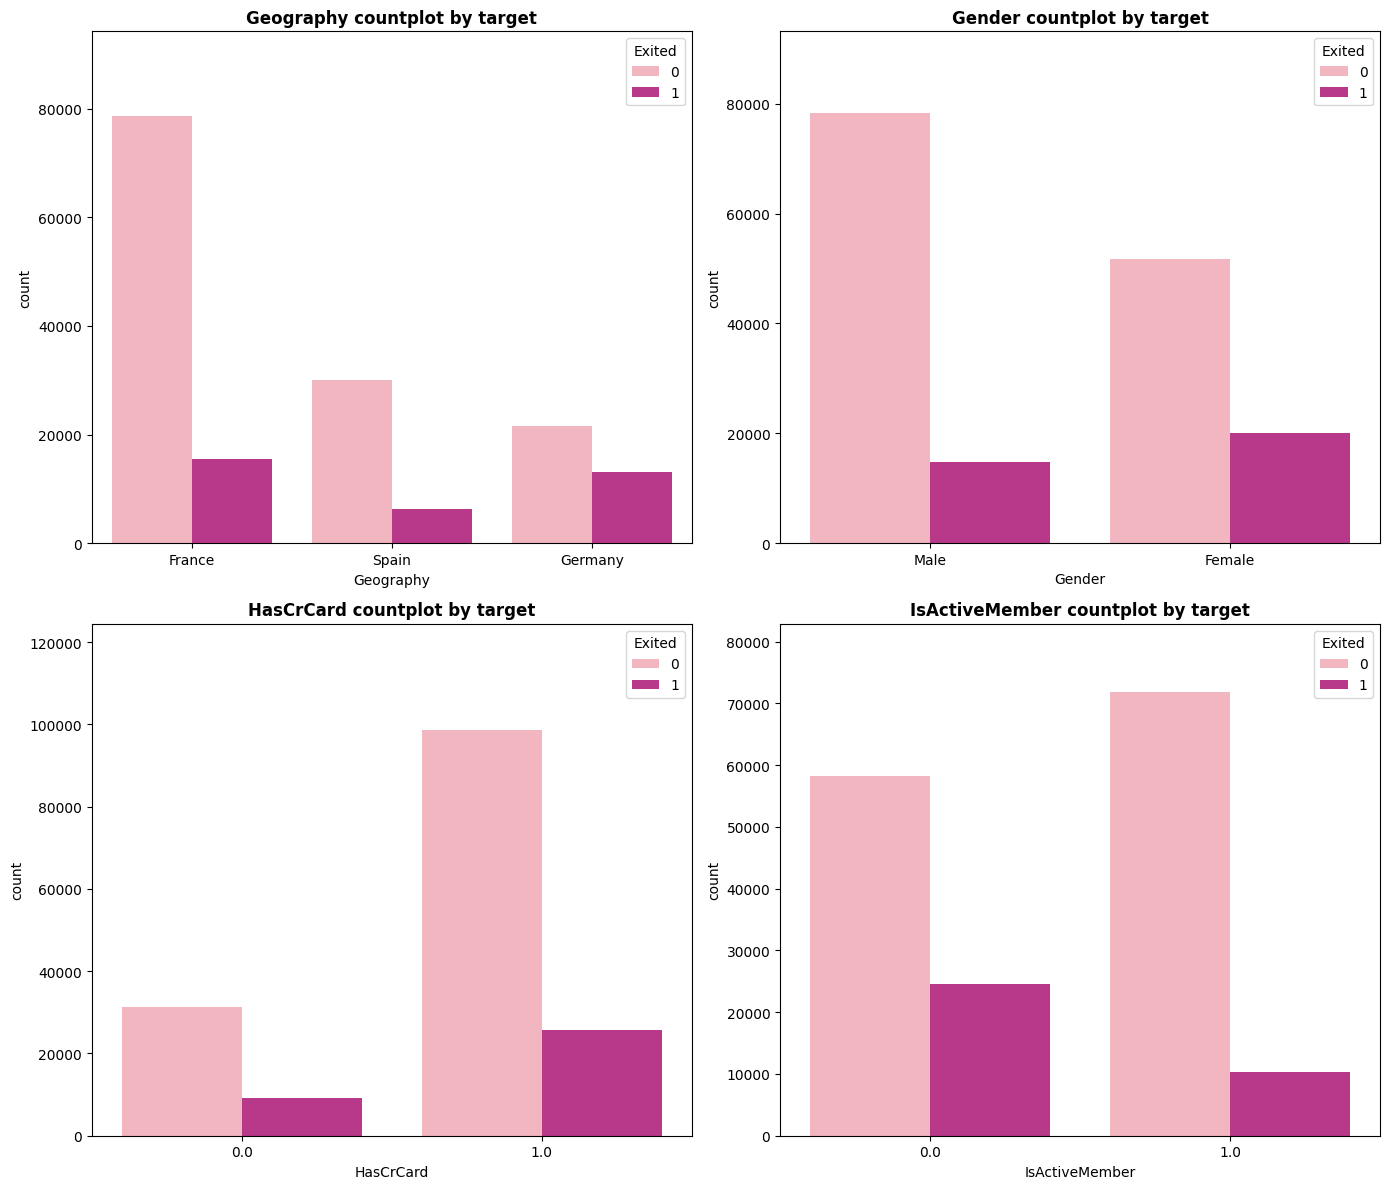

In [12]:
plt.figure(figsize=(14, len(categorical_cols)*3))

for i, col in enumerate(categorical_cols):

    plt.subplot(len(categorical_cols)//2 + len(categorical_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue=target, data=train_data, palette='RdPu')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, train_data[col].value_counts().max() + 10)

plt.tight_layout()
plt.show()

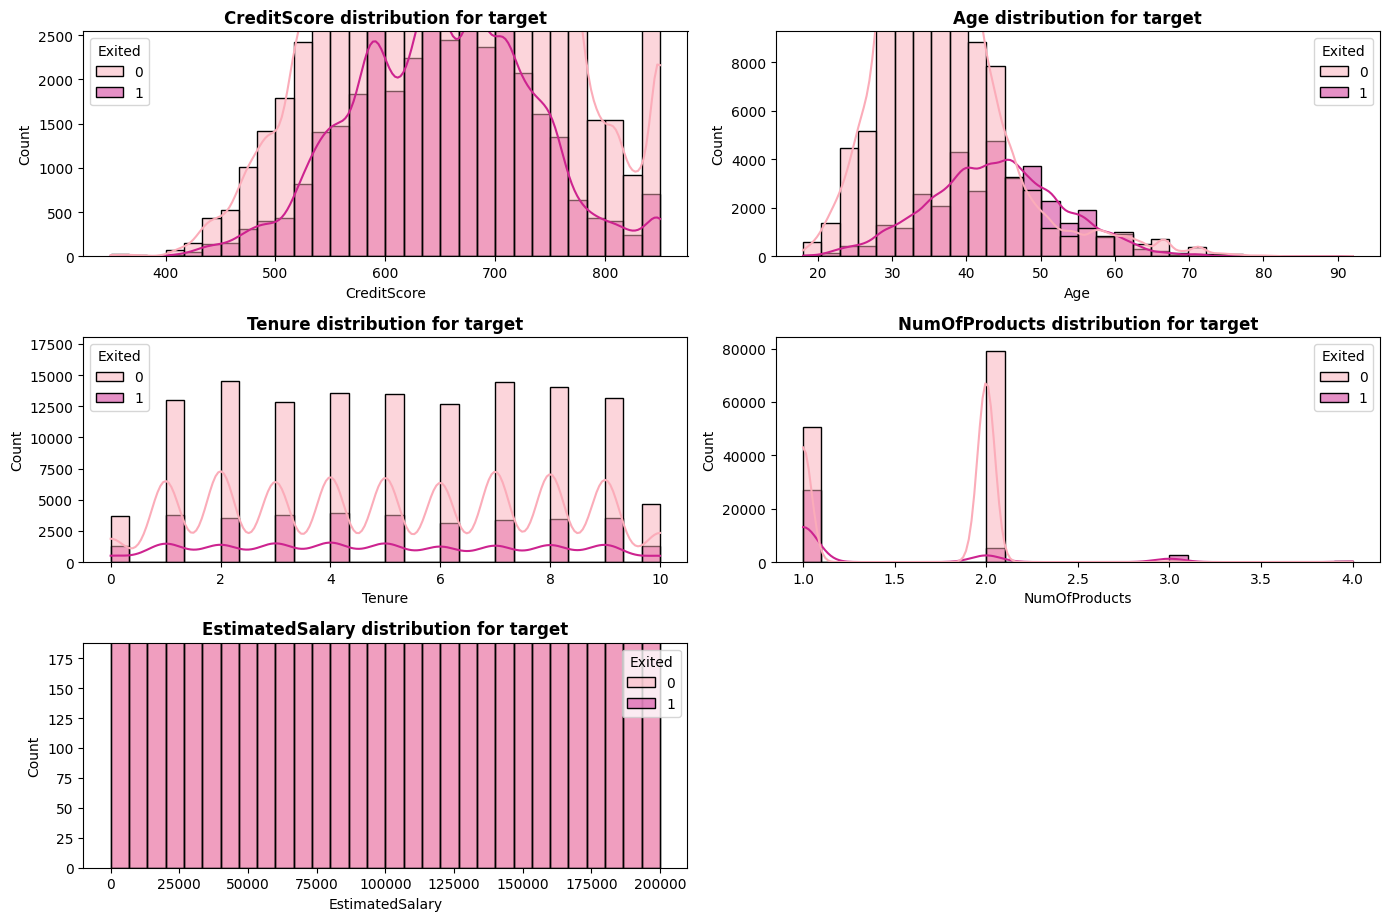

In [13]:
plt.figure(figsize=(14, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    # Plotting for outcome
    plt.subplot(len(num_cols), 2, i+1)
    sns.histplot(x=col, hue=target, data=train_data, bins=30, kde=True, palette='RdPu')
    plt.title(f"{col} distribution for target", fontweight="bold")
    plt.ylim(0, train_data[col].value_counts().max() + 10)

plt.tight_layout()
plt.show()

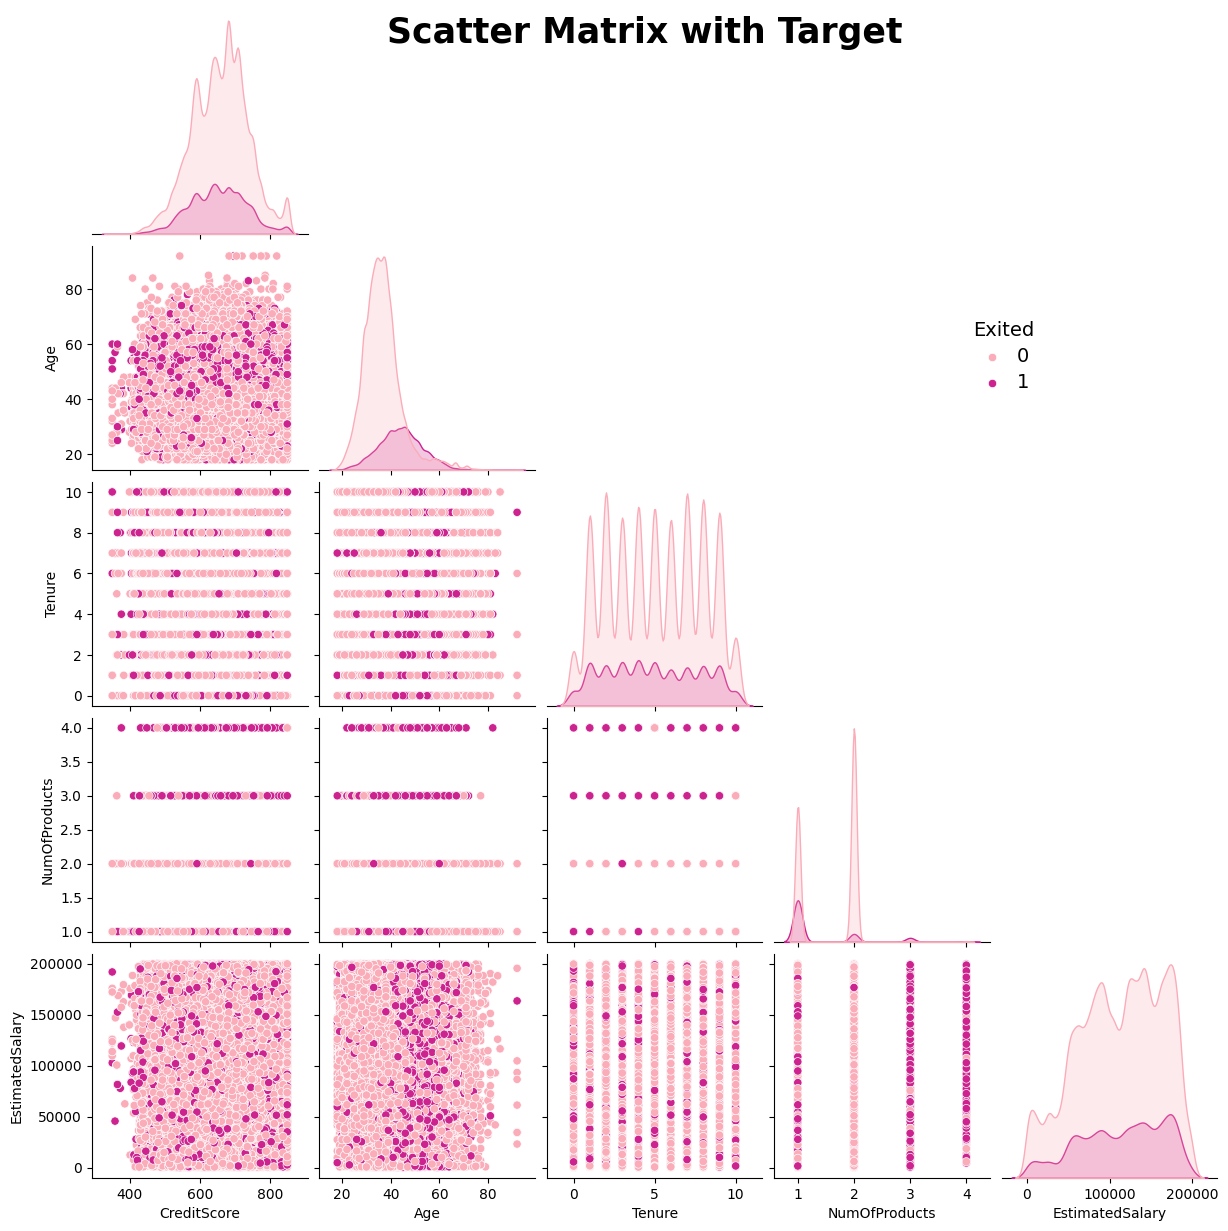

In [14]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=train_data, x_vars=num_var, y_vars=num_var, hue=target, corner=True,  palette='RdPu')
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper left'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()

plot_pair(train_data, num_cols, target, plotname = 'Scatter Matrix with Target')

### CreditScore

In [15]:
train_data['CreditScore'].value_counts()

CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64

### Geography

In [16]:
train_data['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

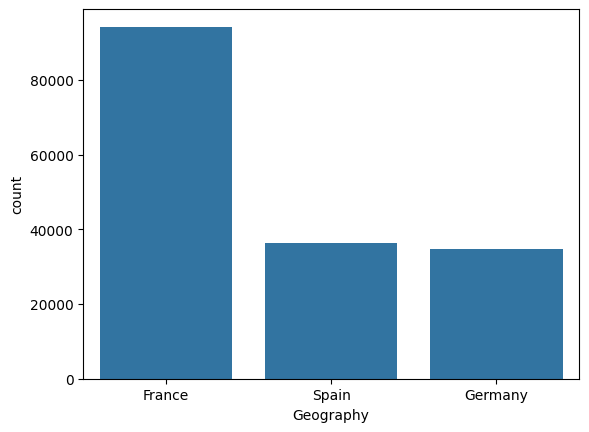

In [17]:
sns.countplot(x='Geography',data=train_data)


### Gender

In [18]:
train_data['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

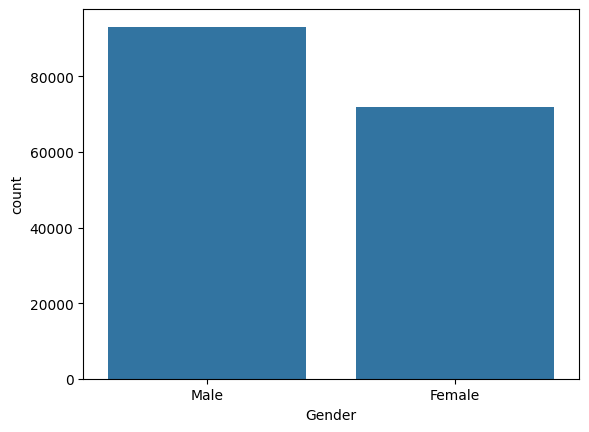

In [19]:
sns.countplot(x='Gender', data=train_data)

### Age

In [20]:
train_data['Age'].value_counts()

Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

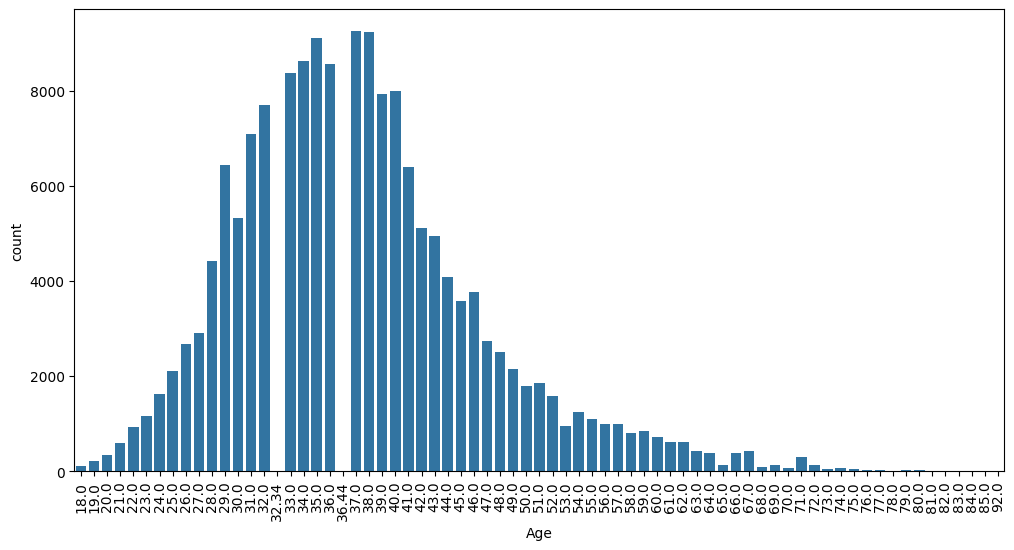

In [21]:
# Age
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [22]:
train_data.loc[train_data['Age']==32.34, 'Age'] = 32
train_data.loc[train_data['Age']==36.44, 'Age'] = 36

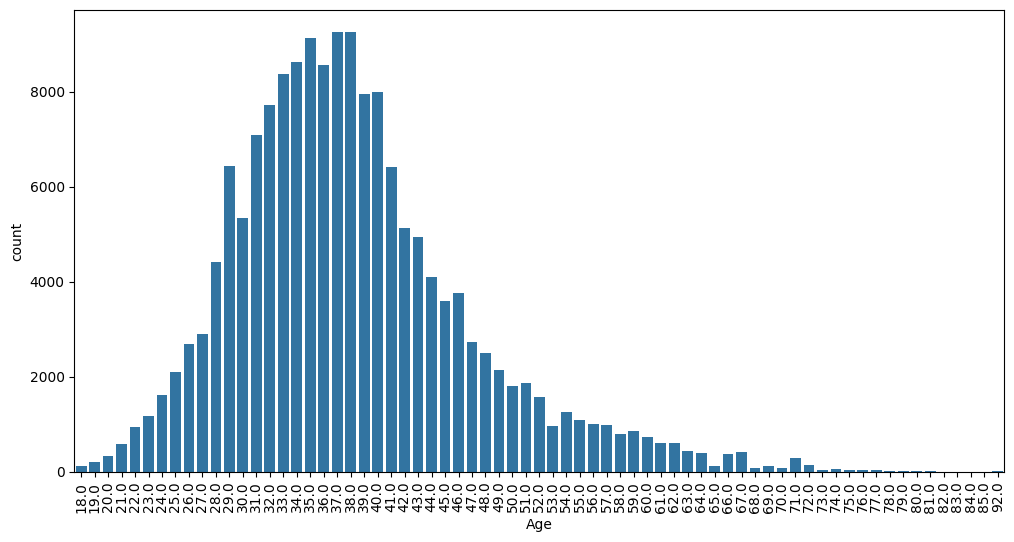

In [23]:
# Age
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=train_data)
plt.xticks(rotation=90)
plt.show()

### Tenure

In [24]:
train_data['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

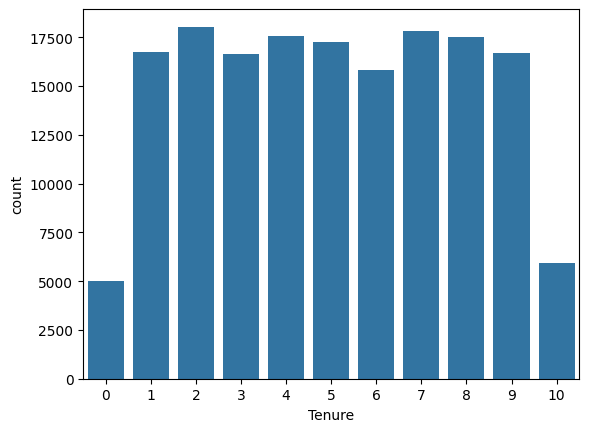

In [25]:
sns.countplot(x='Tenure', data=train_data)

### NumOfProducts

In [26]:
train_data['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

### HasCrCard

In [27]:
train_data['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='count'>

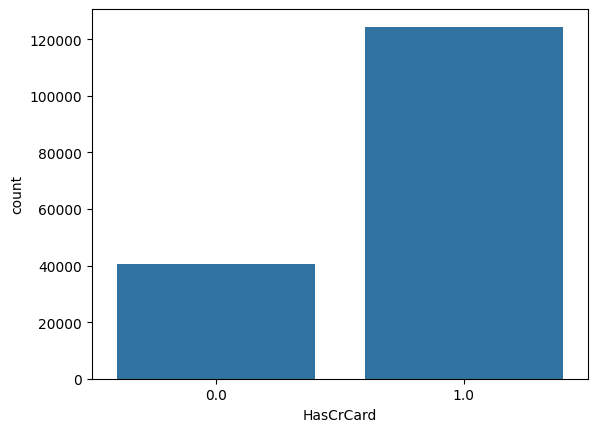

In [28]:
sns.countplot(x='HasCrCard', data=train_data)

### IsActiveMember

In [29]:
train_data['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

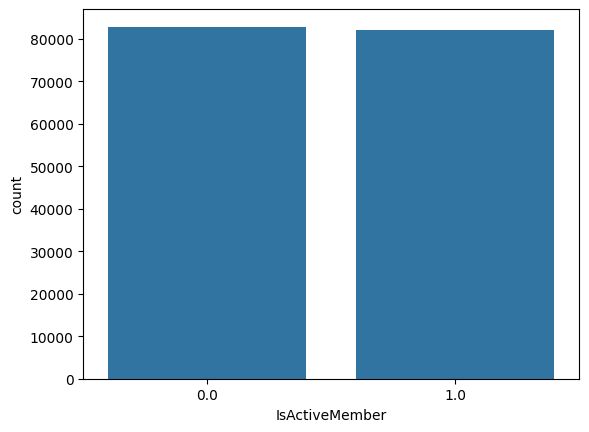

In [30]:
sns.countplot(x='IsActiveMember', data=train_data)

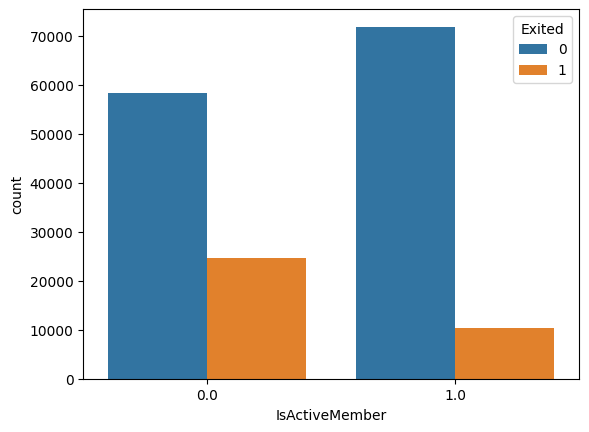

In [31]:
## Analyzing how Active members impact the customers.
sns.countplot(x='IsActiveMember',hue='Exited',data=train_data)
plt.show()

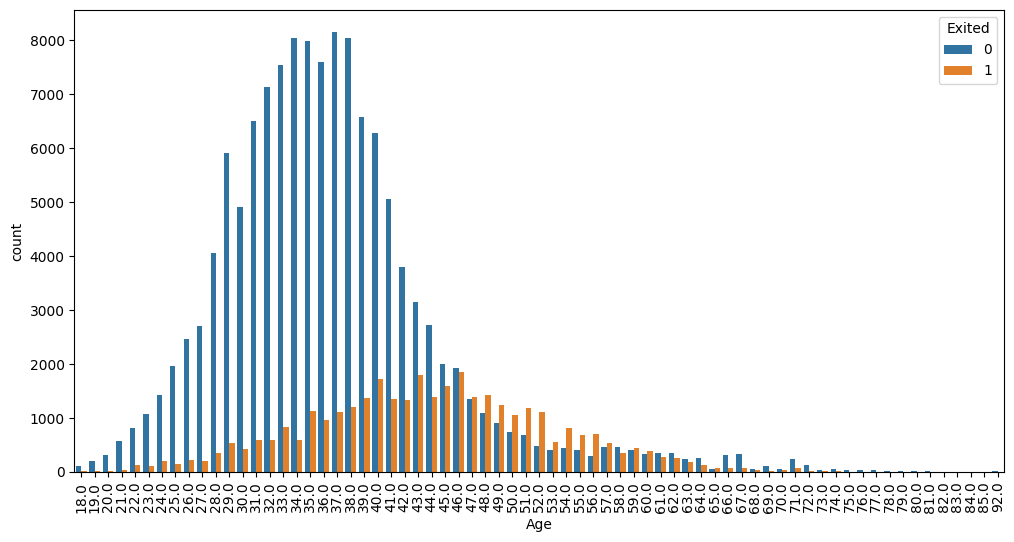

In [32]:
## Analyzing how age impact the customers exit criteria.
plt.figure(figsize=(12,6))
sns.countplot(x='Age',hue='Exited',data=train_data)
plt.xticks(rotation =90)
plt.show()

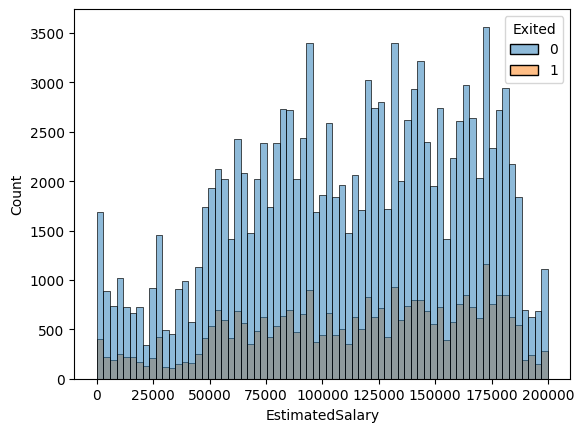

In [33]:
# Analysing Salary with target

sns.histplot(x='EstimatedSalary', hue='Exited',data=train_data)
plt.show()

## Data Preprocessing and Feature Engineering.

In [34]:
train_data.duplicated().sum()

30

In [35]:
train_data.drop_duplicates(inplace=True)

In [36]:
train_data.shape

(165004, 12)

In [37]:
train_data.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650040e+05,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000,165004.000000
mean,1.569200e+07,656.458037,38.125355,5.020515,55477.203173,1.554465,0.753933,0.497739,112576.218053,0.211601
std,7.139829e+04,80.101397,8.866925,2.806134,62817.816773,0.547161,0.430719,0.499996,50293.024195,0.408445
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563312e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.645000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [39]:
train_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lb=LabelEncoder()
train_data.Gender=lb.fit_transform(train_data['Gender'])
train_data.Geography=lb.fit_transform(train_data['Geography'])


In [42]:
train_data.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165004 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165004 non-null  int64  
 1   CreditScore      165004 non-null  int64  
 2   Geography        165004 non-null  int64  
 3   Gender           165004 non-null  int64  
 4   Age              165004 non-null  float64
 5   Tenure           165004 non-null  int64  
 6   Balance          165004 non-null  float64
 7   NumOfProducts    165004 non-null  int64  
 8   HasCrCard        165004 non-null  float64
 9   IsActiveMember   165004 non-null  float64
 10  EstimatedSalary  165004 non-null  float64
 11  Exited           165004 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 16.4 MB


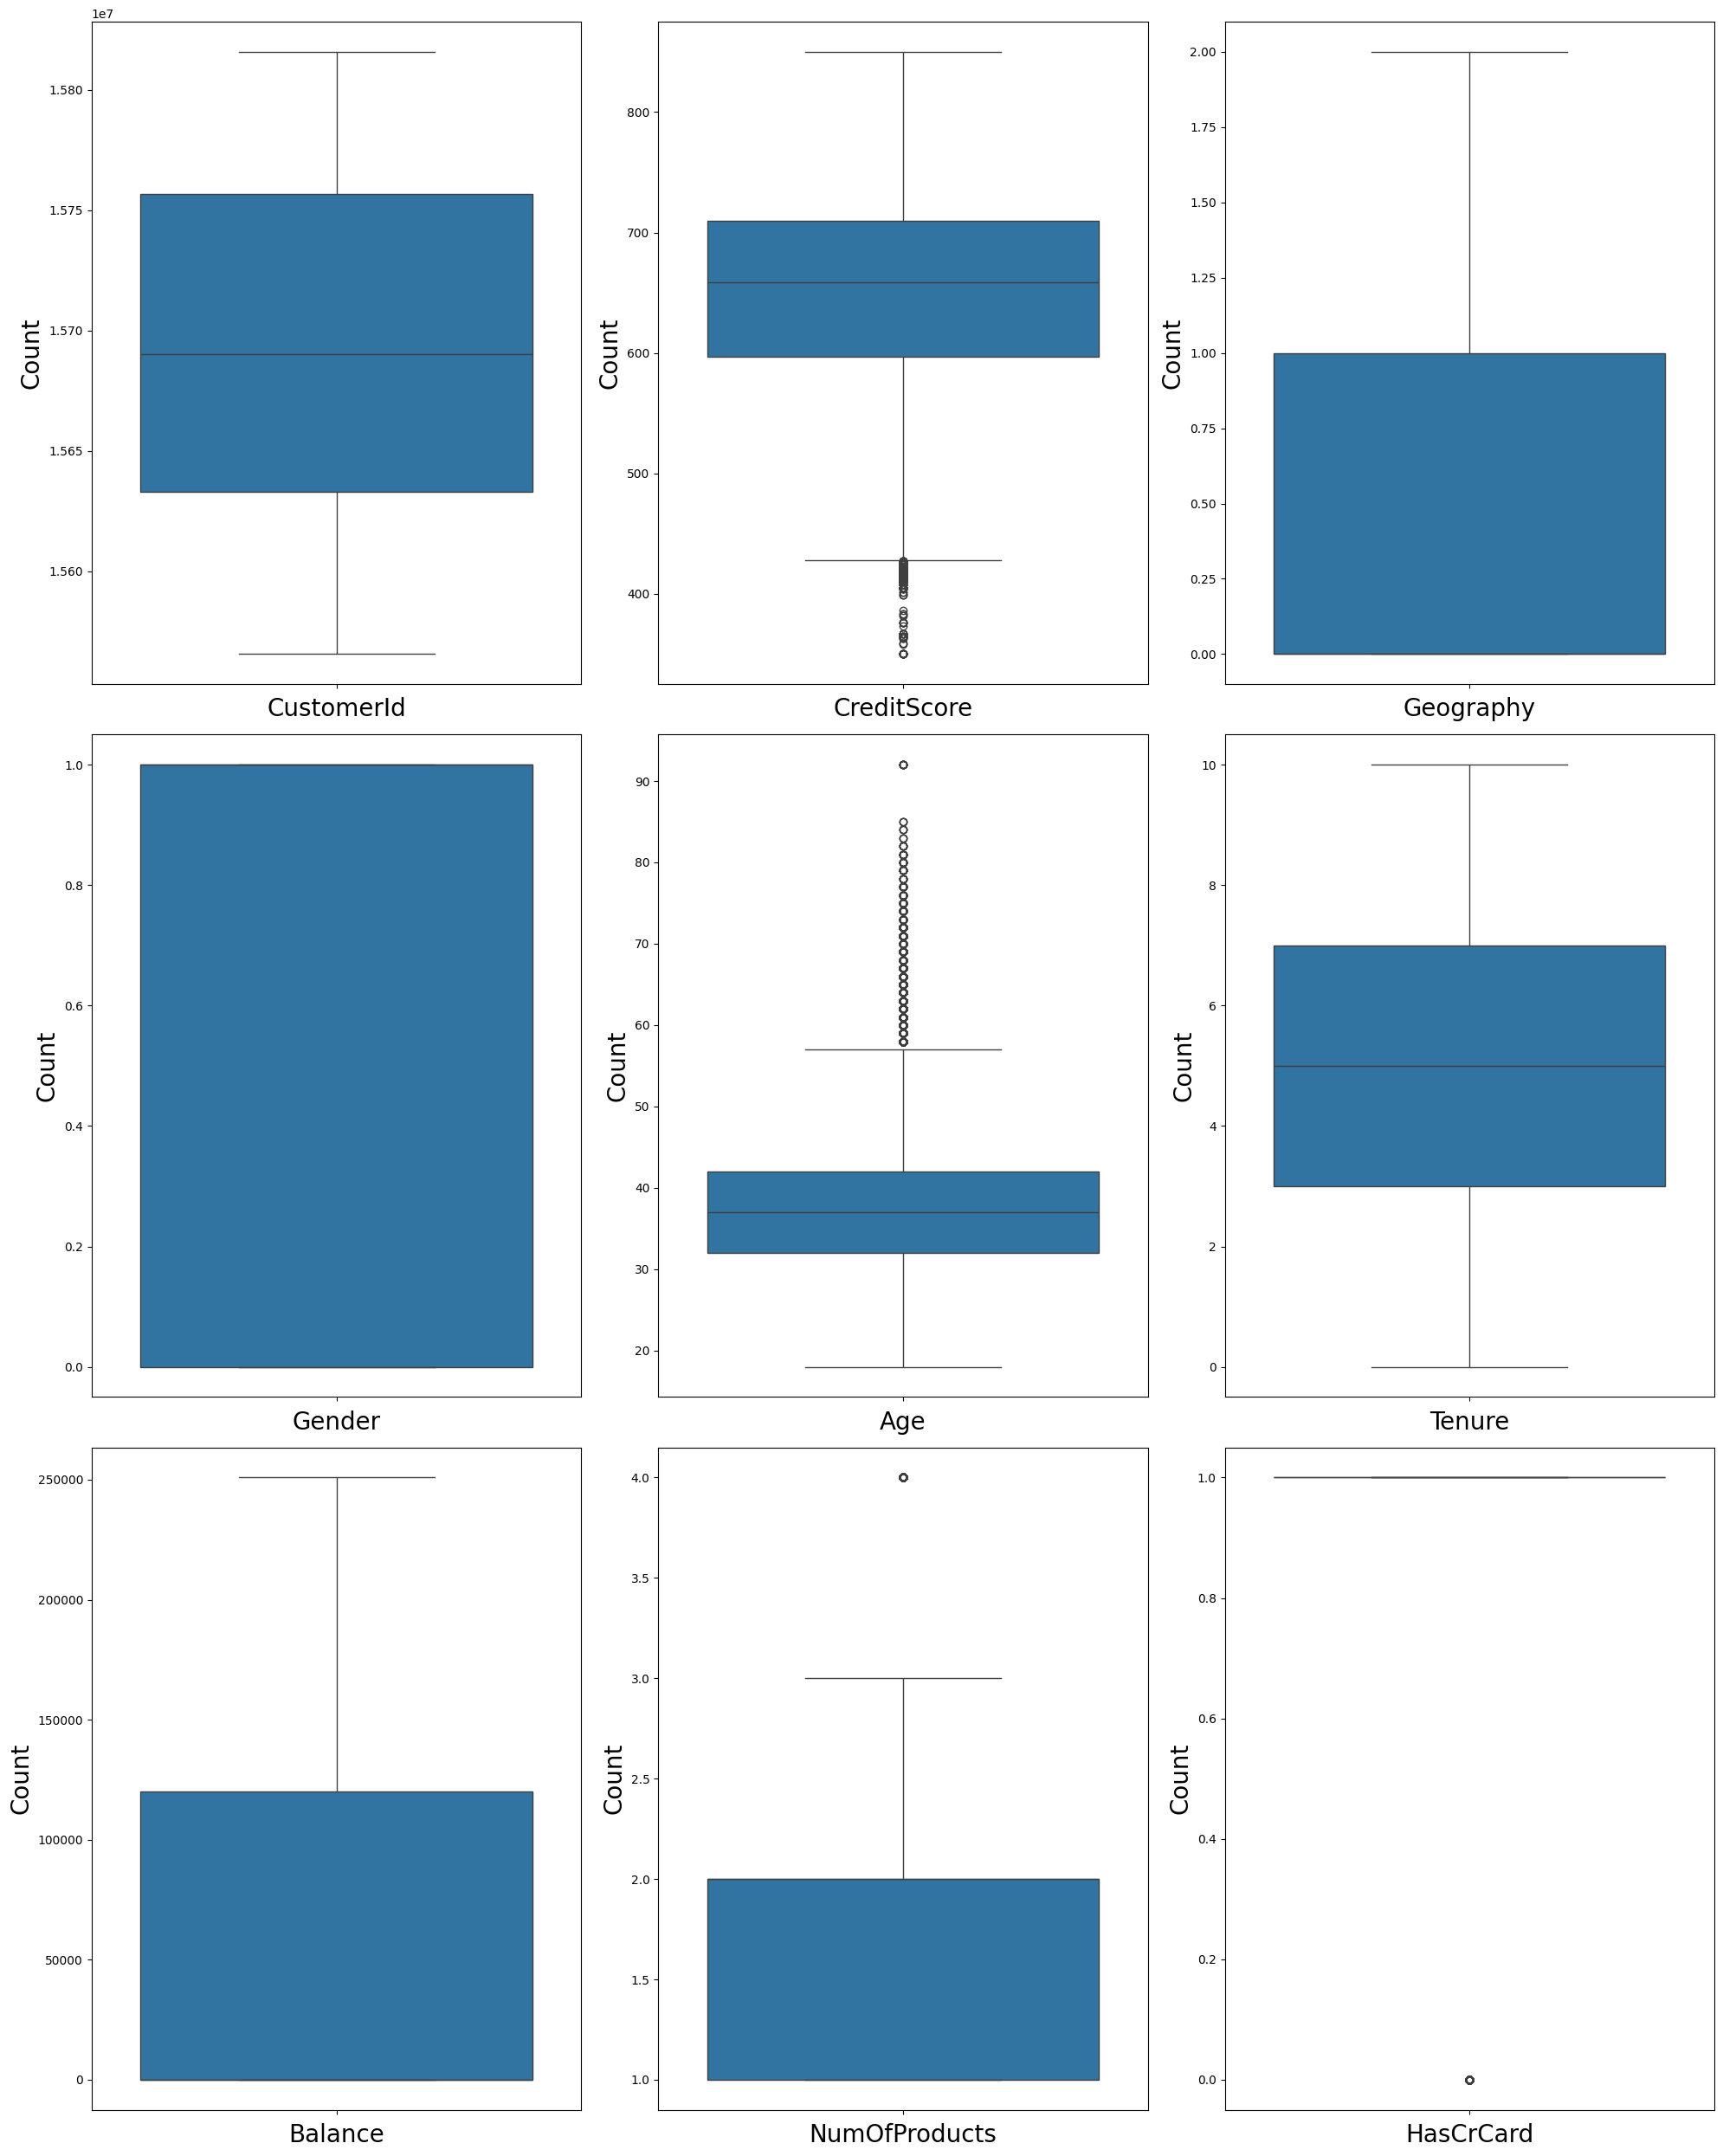

In [45]:
# Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in train_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Exited', ylabel='count'>

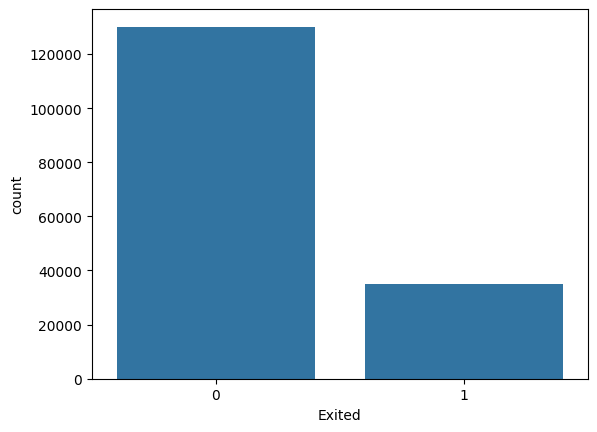

In [46]:
# Target column
sns.countplot(x='Exited', data=train_data)

## Feature  Selection

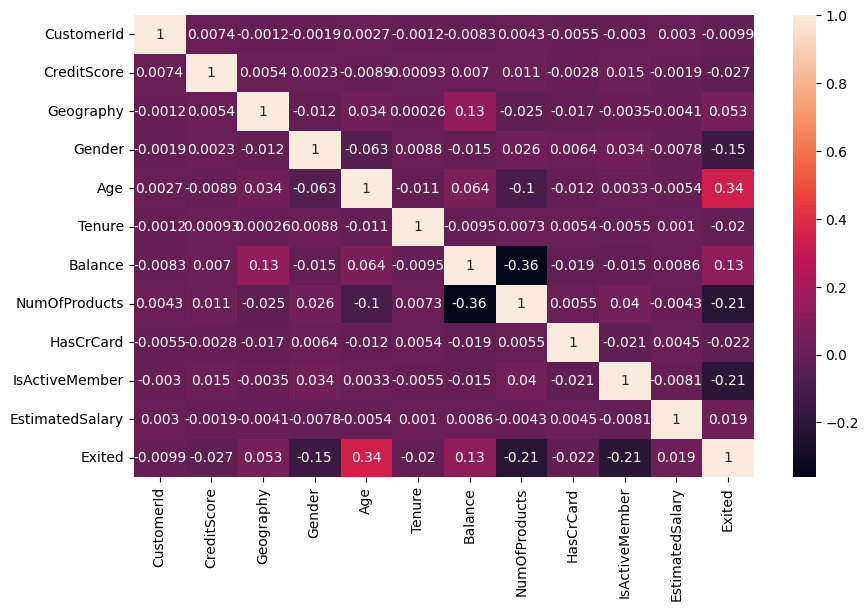

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True)
plt.show()